In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

####

data = pd.read_csv('inventory_lot_cleaned.csv')

'''Information that is not helpful yet, as model is only looking at Honda Accord cars. Variations of price depending 
on model,engine, and brand should be reflected in price'''
data = data.drop(['Brand', 'Model', 'Engine', 'Unnamed: 0'], axis = 1)

#if price is "0", remove from dataset
data = data.loc[data['Price'] != 0]


In [60]:


#testing for any data errors with sample model
X = data[['Year', 'Mileage', 'KeylessStart', 'LaneDepartureWarning',]]
y = data['Price']


X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(x_test)
print(pred)
score1 = model.score(x_test, y_test)
print(score1)

#initial score shows no relationship 


[25585.51810292 27318.96360735 27257.39147179 27318.18492129
 27318.96360735 25581.62467259 27320.52097948 27262.06358818
 27258.17015786 27257.39147179 27263.62096031 27318.18492129
 27258.94884392 27262.06358818 27264.39964637 27258.94884392
 27322.07835161 27272.18650701 27257.39147179 27318.96360735
 27257.39147179 27272.96519308 27262.84227424 27261.28490212
 27309.5634381  27318.18492129 29668.98221259 27322.07835161
 27320.52097948 27323.63572374 27258.94884392 27269.07176276
 27261.28490212 27318.18492129 27322.07835161 27265.17833244
 27343.82562492 27337.65207289 27263.62096031 27262.84227424
 27265.17833244 27259.72752999 27265.9570185  27262.06358818
 27257.39147179 27325.97178193 27257.39147179 27266.73570457
 27320.52097948 27269.07176276 27269.07176276 25580.84598653
 27262.84227424 27262.06358818 27261.28490212 27259.72752999
 27325.97178193 27258.94884392 25585.51810292 27318.18492129
 27262.84227424 27258.17015786]
-0.029993938095283612


In [2]:
#Standardizing the data
#standardizing the column to see if putting price, mileage, and year on the same scale as features (0 to 1) would
#improve the model. 
from sklearn import preprocessing

names = data.columns

scaler = preprocessing.StandardScaler()

data_std = scaler.fit_transform(data)
data_std = pd.DataFrame(data_std, columns = names)



#new model 


x = data_std[['Year', 'Mileage', 'KeylessStart', 'LaneDepartureWarning',]]
y = data[['Price']]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

linreg_std = LinearRegression()
linreg_std.fit(x_train, y_train)

pred = linreg_std.predict(x_test)

score2 = linreg_std.score(x_test, y_test)
print(score2)

#standardizing results in the same score. 
#standarding also loses pricing information, car dealer owners may price their cars based on either recommended prices
#or personal opinion, standardizing diminishes the variation, losing an important bias in this case. 

-0.029993938095289604


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


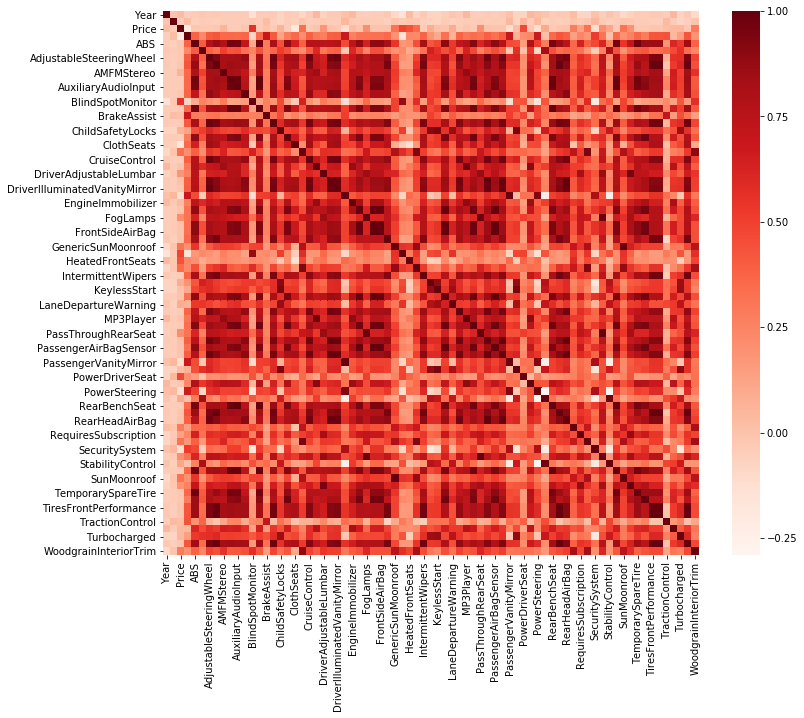

In [7]:
import seaborn as sns
#Using Pearson Correlation to make a heatmap of feauture correlation and plotting it with seaborn 
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [21]:
#finding correlation of price with every feature
cor_target = abs(cor["Price"])
#Selecting highly correlated features
#in this case any feature that has a 0.015 correlation with price
#even such a tiny number is important to capture as many features as possible without compromising correlation value
relevant_features = cor_target[cor_target>0.015]
relevant_features = relevant_features.drop('Price', axis = 0)
relevant_cols = relevant_features.index
print(relevant_cols)
print(relevant_features)

Index(['Year', 'Mileage', '4WheelDiscBrakes', 'ABS', 'AdaptiveCruiseControl',
       'AdjustableSteeringWheel', 'AluminumWheels', 'AMFMStereo',
       'AutomaticHeadlights', 'AuxiliaryAudioInput', 'BlindSpotMonitor',
       'BluetoothConnection', 'BucketSeats', 'ChildSafetyLocks',
       'ClimateControl', 'ClothSeats', 'CrossTrafficAlert', 'CruiseControl',
       'DriverAdjustableLumbar', 'DriverIlluminatedVanityMirror',
       'DriverVanityMirror', 'EngineImmobilizer', 'FogLamps',
       'GenericSunMoonroof', 'HDRadio', 'HeatedFrontSeats', 'HeatedMirrors',
       'IntermittentWipers', 'KeylessEntry', 'LaneDepartureWarning',
       'LaneKeepingAssist', 'MultiZoneAC', 'PassThroughRearSeat',
       'PassengerVanityMirror', 'PowerDoorLocks', 'PowerDriverSeat',
       'PowerMirrors', 'PowerSteering', 'PowerWindows', 'RearBenchSeat',
       'RemoteEngineStart', 'RequiresSubscription', 'SatelliteRadio',
       'SecuritySystem', 'SmartDeviceIntegration', 'StabilityControl',
       'SteeringWh

In [22]:
#trying linear regression with correlated columns 


x = data[relevant_cols]
y = data['Price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

linreg = LinearRegression()
linreg.fit(x_train, y_train)

pred = linreg.predict(x_test)

score2 = linreg.score(x_test, y_test)
print(score2)

0.41263697202104244


In [20]:
#trying random forest 
from sklearn.ensemble import RandomForestRegressor

x = data[relevant_cols]
y = data['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

pred = regressor.predict(x_test)
score = regressor.score(x_test, y_test)

print(score)

#yields a better value. 

0.457111077964948


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
